In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df=pd.read_csv("./data/train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# data visualization

1.Pclass vs survived

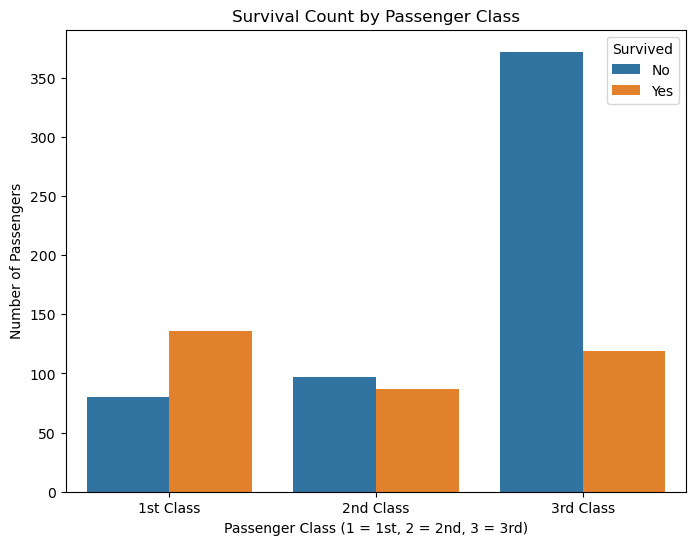

In [5]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Pclass', hue='Survived', data=df)
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Number of Passengers')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

*it can be seen that pclass do relate to the survival of the passengers


In [6]:
#looking for some percentages
passenger_class_counts = df['Pclass'].value_counts().sort_index()
print("Total Passengers in Each Class:")
print(passenger_class_counts)

Total Passengers in Each Class:
Pclass
1    216
2    184
3    491
Name: count, dtype: int64


In [7]:
survival_rate_per_class = df.groupby('Pclass')['Survived'].mean() * 100

print("Survival Rate per Passenger Class:")
print(survival_rate_per_class)

Survival Rate per Passenger Class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


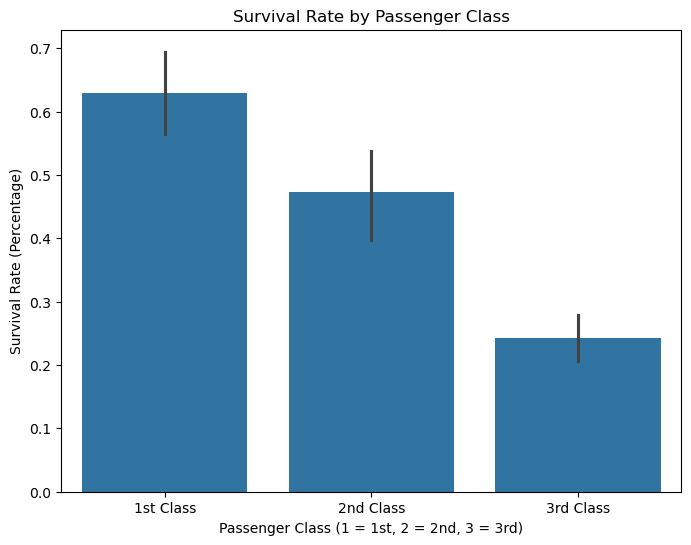

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class (1 = 1st, 2 = 2nd, 3 = 3rd)')
plt.ylabel('Survival Rate (Percentage)')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

2.Sex vs Survived

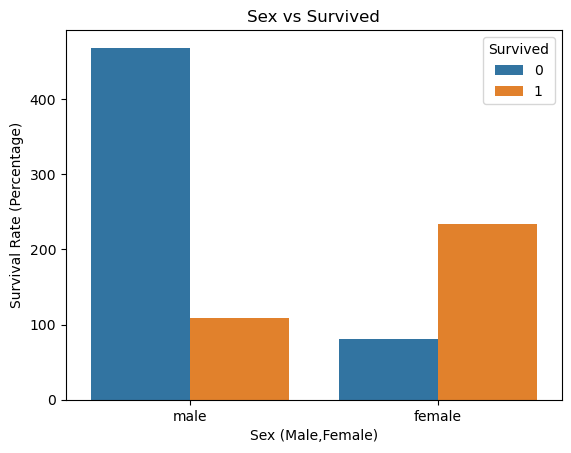

In [9]:
sns.countplot(x=df["Sex"],hue=df["Survived"],data=df)
plt.title('Sex vs Survived')
plt.xlabel('Sex (Male,Female)')
plt.ylabel('Survival Rate (Percentage)')
plt.show()

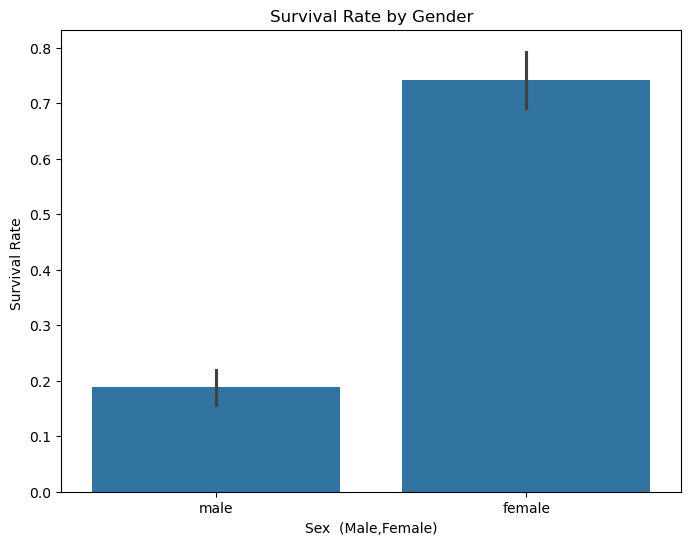

In [10]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.xlabel('Sex  (Male,Female)')
plt.ylabel('Survival Rate ')
# plt.xticks(['Male','Female'])
plt.show()

In [11]:
# #Age vs Survived
# plt.figure(figsize=(8, 6))
# plt.scatter(df['Age'], df['Survived'], alpha=0.6,c='Sex') # alpha controls the transparency of the points
# plt.xlabel('Age')
# plt.ylabel('Survival (0 = No, 1 = Yes)')
# plt.title('Age vs Survival')
# plt.grid(True)
# plt.yticks([0, 1], ['No', 'Yes']) # Label the y-axis ticks
# plt.show()


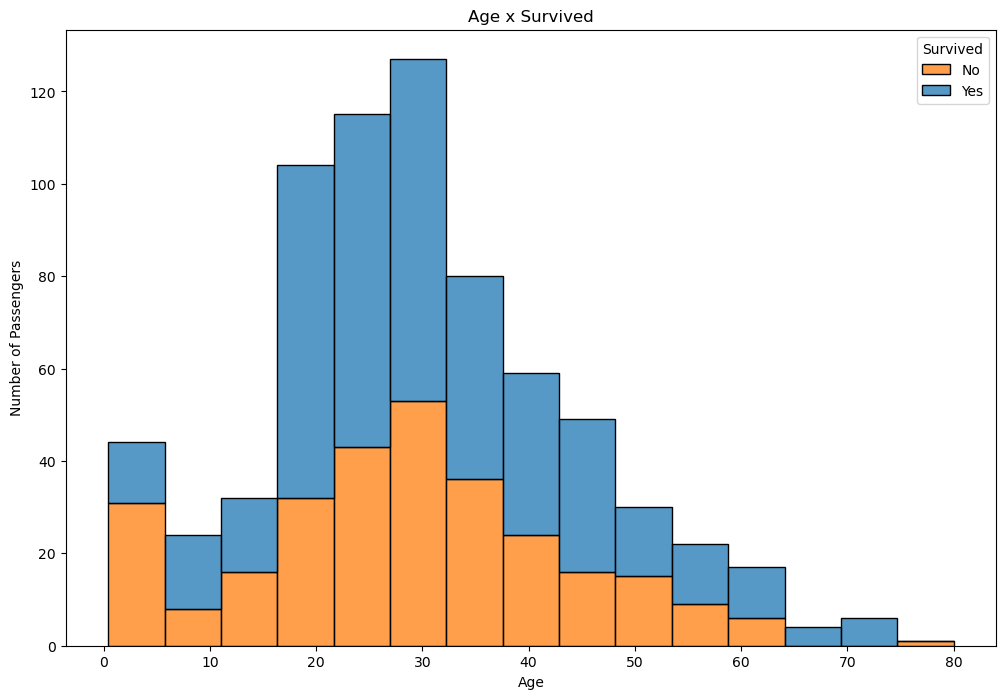

In [12]:
# columns = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

# for column in columns:
plt.figure(figsize=(12, 8))
sns.histplot(x='Age', hue='Survived', data=df, bins=15, multiple="stack")
plt.title("Age x Survived")
plt.xlabel("Age")
plt.ylabel("Number of Passengers")
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

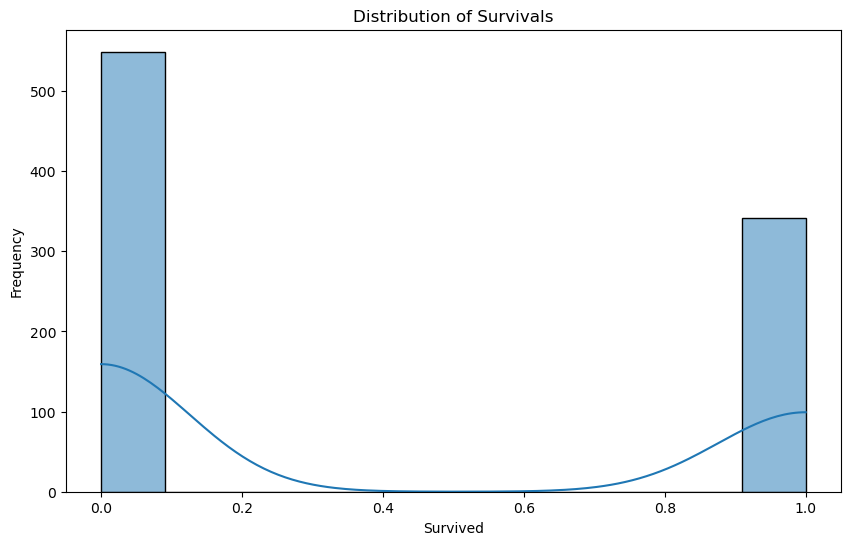

In [26]:
#survival frequency
plt.figure(figsize=(10, 6))
sns.histplot(df['Survived'], kde=True)  # Histogram with KDE (Kernel Density Estimate)
plt.title('Distribution of Survivals')
plt.xlabel('Survived')
plt.ylabel('Frequency')
plt.show()

In [14]:
#checking for imbalance
class_percentages = df['Survived'].value_counts(normalize=True) * 100
print(class_percentages)


Survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


In [18]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from collections import Counter
X = df.drop('Survived', axis=1)
y = df['Survived']

# Print the original class distribution
print("Original class distribution:", Counter(y))

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to oversample the minority class (Survived = 1)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Print the resampled class distribution
print("Resampled class distribution:", Counter(y_resampled))

# Create a new DataFrame with the resampled data (optional, for further use)
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['Survived'] = y_resampled

# Display the first few rows of the resampled DataFrame
print("\nFirst few rows of the resampled DataFrame:")
print(df_resampled.head())

Original class distribution: Counter({0: 549, 1: 342})


ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
print("Missing values in Cabin:")
print(df['Cabin'].isnull().sum())

# Examine unique values in 'Cabin'
print("\nUnique values in Cabin:")
print(df['Cabin'].unique())

# Examine unique values in 'Ticket'
print("\nUnique values in Ticket:")
print(df['Ticket'].shape[0])


Missing values in Cabin:
687

Unique values in Cabin:
[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B4

In [17]:
print(df['Fare'].unique().shape[0]

SyntaxError: incomplete input (487597412.py, line 1)

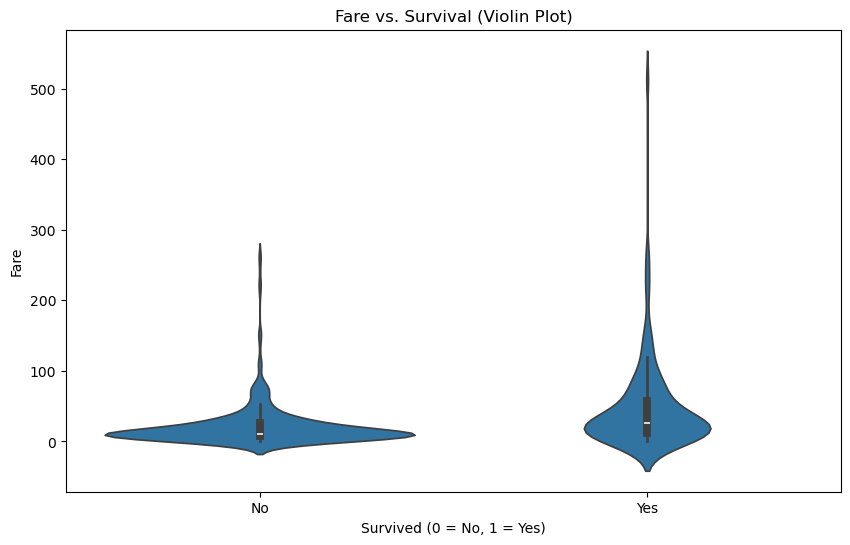

In [18]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare vs. Survival (Violin Plot)')
plt.xlabel('Survived (0 = No, 1 = Yes)')
plt.ylabel('Fare')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


In [19]:
print("Missing values in Cabin:")
print(df['Embarked'].isnull().sum())

# Examine unique values in 'Cabin'
print("\nUnique values in Cabin:")
print(df['Embarked'].unique())

# Examine unique values in 'Ticket'
print("\nUnique values in Ticket:")
print(df['Embarked'].shape[0])

Missing values in Cabin:
2

Unique values in Cabin:
['S' 'C' 'Q' nan]

Unique values in Ticket:
891


In [20]:
print("Original DataFrame:")
print(df.head())

# Drop the specified columns
columns_to_drop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
df_dropped = df.drop(columns=columns_to_drop)

print("\nDataFrame after dropping columns:")
print(df_dropped.head())

print("\nShape of the original DataFrame:", df.shape)
print("Shape of the DataFrame after dropping columns:", df_dropped.shape)


Original DataFrame:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500

In [21]:
df_dropped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


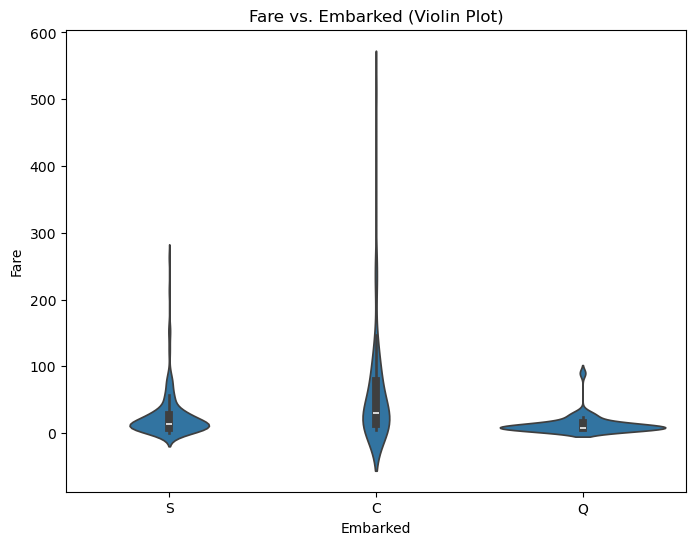

In [22]:
# preprocessing and feature engineering
plt.figure(figsize=(8, 6))
sns.violinplot(x='Embarked', y='Fare', data=df)
plt.title('Fare vs. Embarked (Violin Plot)')
plt.xlabel('Embarked')
plt.ylabel('Fare')
plt.show()



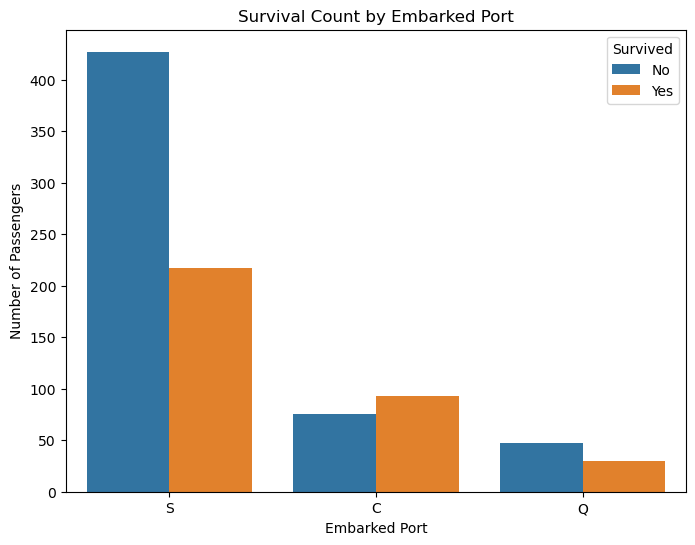

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Embarked', hue='Survived', data=df)
plt.title('Survival Count by Embarked Port')
plt.xlabel('Embarked Port')
plt.ylabel('Number of Passengers')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline



# Separate target variable
y = df_dropped['Survived']
X = df_dropped.drop('Survived', axis=1)

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns

# Create preprocessing pipelines for numerical features
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Create preprocessing pipelines for categorical features
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Create a preprocessor object using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)])

# Create the final pipeline (optional, but good practice for model building)
pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

# Fit and transform the data
X_processed = pipeline.fit_transform(X)

# Get the names of the one-hot encoded columns
feature_names = pipeline.named_steps['preprocessor'].transformers_[1][2] # Get categorical column names
encoded_feature_names = pipeline.named_steps['preprocessor'].named_transformers_['cat']['onehot'].get_feature_names_out(feature_names)

# Create a new DataFrame with the processed features
X_processed_df = pd.DataFrame(X_processed, columns=numerical_features.tolist() + encoded_feature_names.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed_df, y, test_size=0.2, random_state=42)

print("Processed Training Data:")
print(X_train)
print("\nProcessed Testing Data:")
print(X_test)
print("\nTraining Target:")
print(y_train)
print("\nTesting Target:")
print(y_test)

Processed Training Data:
       Pclass       Age     SibSp     Parch      Fare  Sex_female  Sex_male  \
331 -1.566107  1.240235 -0.474545 -0.473674 -0.074583         0.0       1.0   
733 -0.369365 -0.488887 -0.474545 -0.473674 -0.386671         0.0       1.0   
382  0.827377  0.202762 -0.474545 -0.473674 -0.488854         0.0       1.0   
704  0.827377 -0.258337  0.432793 -0.473674 -0.490280         0.0       1.0   
813  0.827377 -1.795334  3.154809  2.008933 -0.018709         1.0       0.0   
..        ...       ...       ...       ...       ...         ...       ...   
106  0.827377 -0.642586 -0.474545 -0.473674 -0.494391         1.0       0.0   
270 -1.566107 -0.104637 -0.474545 -0.473674 -0.024246         0.0       1.0   
860  0.827377  0.894411  1.340132 -0.473674 -0.364355         0.0       1.0   
435 -1.566107 -1.180535  0.432793  2.008933  1.767741         1.0       0.0   
102 -1.566107 -0.642586 -0.474545  0.767630  0.907738         0.0       1.0   

     Embarked_C  Embarked_

In [25]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 712 entries, 331 to 102
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      712 non-null    float64
 1   Age         712 non-null    float64
 2   SibSp       712 non-null    float64
 3   Parch       712 non-null    float64
 4   Fare        712 non-null    float64
 5   Sex_female  712 non-null    float64
 6   Sex_male    712 non-null    float64
 7   Embarked_C  712 non-null    float64
 8   Embarked_Q  712 non-null    float64
 9   Embarked_S  712 non-null    float64
dtypes: float64(10)
memory usage: 61.2 KB


Logistic Regression Accuracy: 0.8100558659217877
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



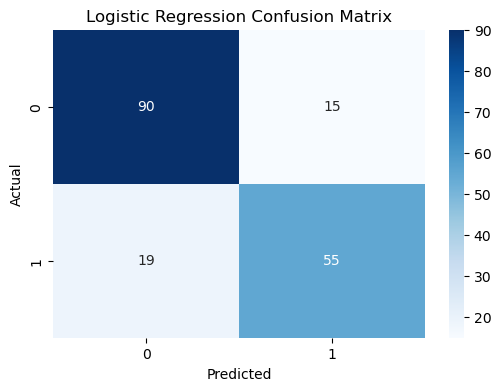

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize models
logistic_regression = LogisticRegression(random_state=42)
decision_tree = DecisionTreeClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train Logistic Regression
logistic_regression.fit(X_train, y_train)
y_pred_lr = logistic_regression.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression Classification Report:\n", classification_report(y_test, y_pred_lr))
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Train Decision Tree
# decision_tree.fit(X_train, y_train)
# y_pred_dt = decision_tree.predict(X_test)
# accuracy_dt = accuracy_score(y_test, y_pred_dt)
# print("\nDecision Tree Accuracy:", accuracy_dt)
# print("Decision Tree Classification Report:\n", classification_report(y_test, y_pred_dt))
# cm_dt = confusion_matrix(y_test, y_pred_dt)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Greens')
# plt.title('Decision Tree Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

# # Train Random Forest
# random_forest.fit(X_train, y_train)
# y_pred_rf = random_forest.predict(X_test)
# accuracy_rf = accuracy_score(y_test, y_pred_rf)
# print("\nRandom Forest Accuracy:", accuracy_rf)
# print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))
# cm_rf = confusion_matrix(y_test, y_pred_rf)
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Oranges')
# plt.title('Random Forest Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()